In [1]:
# 04. 로지스틱 회귀(Logistic Regression)
# 04-01. 로지스틱 회귀(Logistic Regression)

# 이진 분류문제를 풀기 위한 대표적인 알고리즘 

# 선형 회귀: H(x) = Wx + b
# 로지스틱 회귀: H(x) = f(Wx + b), f = sigmoid function 

# 시그모이드 함수(Sigmoid function)

In [2]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립사용

In [3]:
def sigmoid(x): # 시그모이드 함수 정의 
    return 1 / (1 + np.exp(-x))

## W = 1, b = 0 인 그래프 

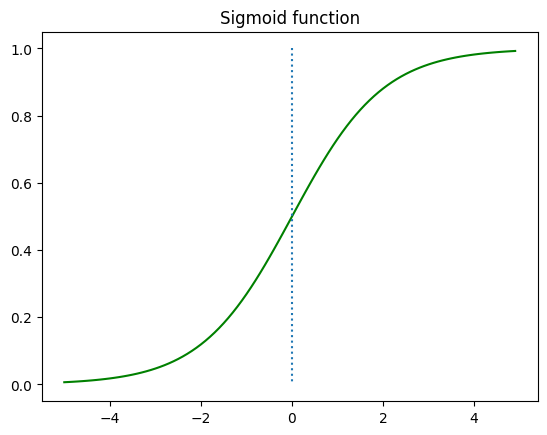

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)  # w = 1

plt.plot(x, y, 'g')
plt.plot([0, 0], [1.0, 0.0], ':')   # 가운데 점선 추가 
plt.title('Sigmoid function')
plt.show()

## W 의 변화에 따른 경사도의 변화

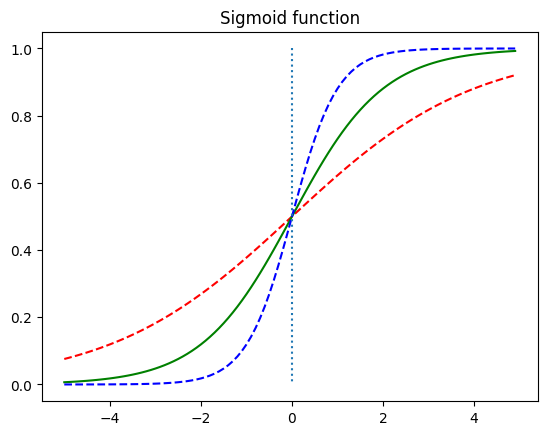

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x) # w = 0.5
y2 = sigmoid(x)
y3 = sigmoid(2*x)   # w = 2

plt.plot(x, y1, 'r', linestyle = '--')  # w = 0.5
plt.plot(x, y2, 'g')    # w = 1
plt.plot(x, y3, 'b', linestyle = '--')  # w = 2
plt.plot([0, 0], [1.0, 0.0], ':')   # 가운데 점선 추가 
plt.title('Sigmoid function')
plt.show()

## b 의 변화에 따른 좌, 우 이동

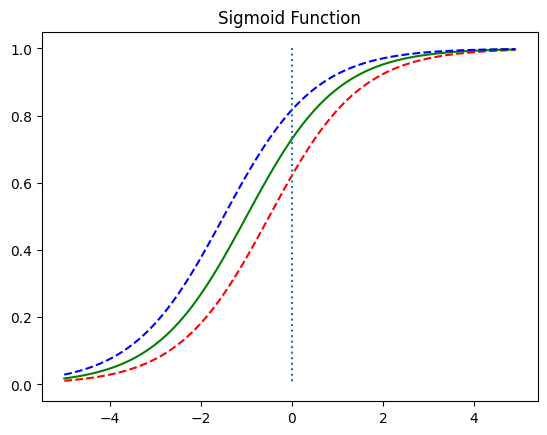

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5) # w = 1, b = 0.5
y2 = sigmoid(x+1)   # w = 1, b = 1
y3 = sigmoid(x+1.5) # w = 1, b = 1.5

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

# 파이토치로 로지스틱 회귀 구현 

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [13]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 직접 구현한 가설식 
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [14]:
# 파이토치의 시그모이드 함수를 사용하여 구현한 가설식 
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [17]:
# 비용함수 직접 구현 
loss = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))
print(loss)

cost = loss.mean()
print(cost)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)
tensor(0.6931, grad_fn=<MeanBackward0>)


In [18]:
# 파이토치의 로지스틱 회귀 비용 함수를 사용하여 구현 
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)